### 라쏘, 릿지 구현

C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

Ridege 회귀의 beta_i
 NOX       -2.371619
DIS       -1.248808
PTRATIO   -0.797945
LSTAT     -0.559366
CRIM      -0.101435
INDUS     -0.042962
TAX       -0.013993
AGE       -0.010707
B          0.010037
ZN         0.049579
RAD        0.279596
CHAS       1.952021
RM         3.702272
dtype: float64
Lasso 회귀의 beta_i
 LSTAT     -0.564038
TAX       -0.009282
CRIM      -0.000000
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS       -0.000000
RAD        0.000000
PTRATIO   -0.000000
B          0.007496
ZN         0.026146
dtype: float64


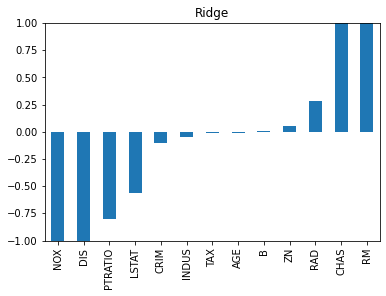

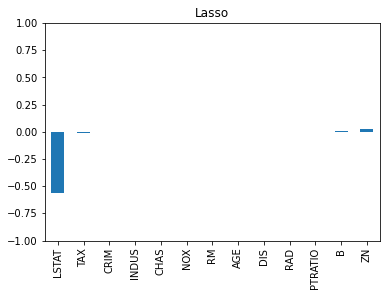

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

def load_data():
    X, y = load_boston(return_X_y=True)
    feature_names = load_boston().feature_names
    #print("X.shape : ", X.shape)
    #print("y.shape : ", y.shape)
    #print("feature_names : ", feature_names)
    return X,y,feature_names

def Ridge_regression(X,y):
    ridge_reg = Ridge(alpha = 10)
    ridge_reg.fit(X,y)
    return ridge_reg
    

def Lasso_regression(X,y):
    lasso_reg = Lasso(alpha = 10)
    lasso_reg.fit(X,y)
    return lasso_reg

def plot_graph(coef,title):
    fig = plt.figure()
    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')


def main():
    X,y,feature_names = load_data()
    ridge_reg = Ridge_regression(X,y)
    lasso_reg = Lasso_regression(X,y)
    
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridege 회귀의 beta_i\n", ridge_coef)
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)
    #print("ridge_reg.coef_",ridge_reg.coef_)
    #print("ridge_reg.coef_",ridge_reg.coef_)
    
    plot_graph(ridge_coef,'Ridge')
    plot_graph(lasso_coef,'Lasso')
    
main()

### Elastic net 구현

ElasticNet 회귀의 평가 점수: 0.7529261038422002

ElasticNet 회귀의 beta_i
 NOX       -12.156353
DIS        -1.458449
PTRATIO    -0.881076
LSTAT      -0.490034
CRIM       -0.079070
INDUS      -0.021011
TAX        -0.012515
AGE        -0.012100
B           0.009741
ZN          0.048669
RAD         0.277583
CHAS        2.985592
RM          3.697319
dtype: float64


C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

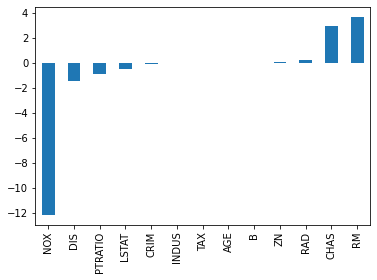

In [27]:
# 엘라스틱넷 구현
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   데이터와 변수 이름을 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 데이터의 변수 이름을 feature_names 에 저장합니다.
"""
def load_data():
    
    X, y = load_boston(return_X_y = True)
    
    feature_names = load_boston().feature_names
    
    return X,y,feature_names

"""
2. 엘라스틱 넷(ElasticNet) 회귀를 구현하고, 
   학습용 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           엘라스틱 넷(ElasticNet) 회귀 모델을 불러옵니다.
           
           파라미터 alpha와 l1_ratio를 자유롭게 설정합니다.
   
   Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킵니다.
"""
def ElasticNet_regression(train_X, train_y):
    
    #ElasticNet_reg = ElasticNet()
    #ElasticNet_reg = ElasticNet(alpha = 0.1)
    #ElasticNet_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
    ElasticNet_reg = ElasticNet(alpha = 0.001, l1_ratio = 0.001)
    
    ElasticNet_reg.fit(train_X,train_y)
    
    return ElasticNet_reg


# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    coef.plot(kind='bar')
    
def main():
    
    X,y,feature_names = load_data()
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    
    # 엘라스틱넷 회귀 모델 평가 점수 출력하기
    score = elasticnet_reg.score(test_X,test_y)
    print("ElasticNet 회귀의 평가 점수:", score)
    
    # 엘라스틱넷 회귀의 beta_i의 크기를 저장합니다.
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("\nElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
main()